In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
df = pd.read_csv('/content/Agmarknet_Price_Report (1).csv')

In [ ]:
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,660,700,685,01-Jan-03
1,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,660,700,685,02-Jan-03
2,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,660,700,685,03-Jan-03
3,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,675,750,700,04-Jan-03
4,Varanasi,Varanasi(Grain),Wheat,Other,FAQ,680,750,700,06-Jan-03


In [ ]:
df.shape

(5651, 9)

In [ ]:
df2 = df.loc[df["District Name"] == "Varanasi", ["Modal Price (Rs./Quintal)", "Price Date"]]

In [ ]:
df2["Price Date"] = pd.to_datetime(df2["Price Date"])

In [ ]:
print(df2.columns)
print(df2)

Index(['Modal Price (Rs./Quintal)', 'Price Date'], dtype='object')
      Modal Price (Rs./Quintal) Price Date
0                           685 2003-01-01
1                           685 2003-01-02
2                           685 2003-01-03
3                           700 2003-01-04
4                           700 2003-01-06
...                         ...        ...
5646                       2520 2023-12-26
5647                       2515 2023-12-27
5648                       2515 2023-12-28
5649                       2510 2023-12-29
5650                       2515 2023-12-30

[5651 rows x 2 columns]


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5651 entries, 0 to 5650
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Modal Price (Rs./Quintal)  5651 non-null   int64         
 1   Price Date                 5651 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 132.4 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
modal_price_column = df2["Modal Price (Rs./Quintal)"].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaledata= scaler.fit_transform(modal_price_column)

In [ ]:
type(scaledata)

numpy.ndarray

In [ ]:
len(scaledata)

5651

In [ ]:
def train_test_split(data,train=0.8,interval=15):
  train_size=int(0.8*len(data))
  train_X=[]
  train_Y=[]
  test_X=[]
  test_Y=[]
  for i in range(train_size):
    train_X.append(data[i:interval+i])
    train_Y.append(data[interval+i])

  for i in range(train_size,len(data)):
    if interval+i+1==len(data):
      break
    test_X.append(data[i:interval+i])
    test_Y.append(data[interval+i])
  return np.array(train_X),np.array(train_Y),np.array(test_X),np.array(test_Y)

In [ ]:
train_X,train_Y,test_X,test_Y=train_test_split(scaledata,interval=50)

In [ ]:
train_X.shape,train_Y.shape,test_X.shape,test_Y.shape

((4520, 50, 1), (4520, 1), (1080, 50, 1), (1080, 1))

evaluate_model_performance() : is a function which takes 4 arguments train_Y-the actual training data, test_Y-the actual testing data, train_predict-the predicted train data by model and test_predict-the predicted test data by model.
This function evaluates the model on the Mean

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model_performance(train_Y,test_Y,train_predict,test_predict):
  print("MAE for train data:",mean_absolute_error(scaler.inverse_transform(train_Y),train_predict))
  print("MAE for test data:",mean_absolute_error(scaler.inverse_transform(test_Y),test_predict))
  print("MSE for train data:",mean_squared_error(scaler.inverse_transform(train_Y),train_predict))
  print("MSE for test data:",mean_squared_error(scaler.inverse_transform(test_Y),test_predict))
  print("RMSE for train data:",math.sqrt(mean_squared_error(scaler.inverse_transform(train_Y),train_predict)))
  print("RMSE for test data:",math.sqrt(mean_squared_error(scaler.inverse_transform(test_Y),test_predict)))
  print("R2 score for train data:",r2_score(scaler.inverse_transform(train_Y),train_predict))
  print("R2 score for test data:",r2_score(scaler.inverse_transform(test_Y),test_predict))

In [ ]:
def plot_training_data(train_predict):
    plt.figure(figsize=(20, 10))
    plt.plot(df2["Price Date"].squeeze()[:4520], df2["Modal Price (Rs./Quintal)"].squeeze()[:4520], color="blue", label="Actual Price (Training)")
    plt.plot(df2["Price Date"].squeeze()[:4520], train_predict.squeeze(), color="green", label="Predicted Price (Training)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("Actual vs. Predicted Prices (Training Data)")
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.legend()
    plt.show()

In [ ]:
def plot_testing_data(test_predict):
  plt.figure(figsize=(20, 10))
  plt.plot(df2["Price Date"].squeeze()[-1080:], df2["Modal Price (Rs./Quintal)"].squeeze()[-1080:], color="blue", label="Actual Price (Test)")
  plt.plot(df2["Price Date"].squeeze()[-1080:], test_predict.squeeze(), color="orange", label="Predicted Price (Test)")
  plt.xlabel("Date")
  plt.ylabel("Price")
  plt.title("Actual vs. Predicted Prices (Test Data)")
  plt.gca().xaxis.set_major_locator(mdates.YearLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
  plt.legend()
  plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import keras

**LSTM**

In [ ]:
LSTM1 = Sequential()
LSTM1.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
LSTM1.add(LSTM(50, return_sequences=True))
LSTM1.add(LSTM(50))
LSTM1.add(Dense(1))
LSTM1.compile(loss='huber_loss', optimizer='adam')
LSTM1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
LSTM1.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=100,batch_size=64, verbose=1)

Epoch 1/100
71/71 [==============================] - 8s 26ms/step - loss: 0.0024 - val_loss: 4.5578e-04
Epoch 2/100
71/71 [==============================] - 1s 13ms/step - loss: 1.7892e-04 - val_loss: 4.7181e-04
Epoch 3/100
71/71 [==============================] - 1s 15ms/step - loss: 1.6837e-04 - val_loss: 4.5680e-04
Epoch 4/100
71/71 [==============================] - 1s 12ms/step - loss: 1.7276e-04 - val_loss: 3.3424e-04
Epoch 5/100
71/71 [==============================] - 1s 11ms/step - loss: 1.7525e-04 - val_loss: 5.4483e-04
Epoch 6/100
71/71 [==============================] - 1s 11ms/step - loss: 1.6930e-04 - val_loss: 3.3585e-04
Epoch 7/100
71/71 [==============================] - 1s 11ms/step - loss: 1.6506e-04 - val_loss: 3.2054e-04
Epoch 8/100
71/71 [==============================] - 1s 11ms/step - loss: 1.7163e-04 - val_loss: 4.3384e-04
Epoch 9/100
71/71 [==============================] - 1s 11ms/step - loss: 1.6466e-04 - val_loss: 2.8776e-04
Epoch 10/100
71/71 [============

In [ ]:
train_predict=LSTM1.predict(train_X)
test_predict=LSTM1.predict(test_X)

34/34 [==============================] - 0s 4ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
evaluate_model_performance(train_Y,test_Y,train_predict,test_predict)

MAE for train data: 10.827904638779899
MAE for test data: 23.673720635308094
MSE for train data: 1722.0198325861877
MSE for test data: 1891.4549748471322
RMSE for train data: 41.497226805970875
RMSE for test data: 43.49086081979905
R2 score for train data: 0.9862652679162396
R2 score for test data: 0.9745780203842568


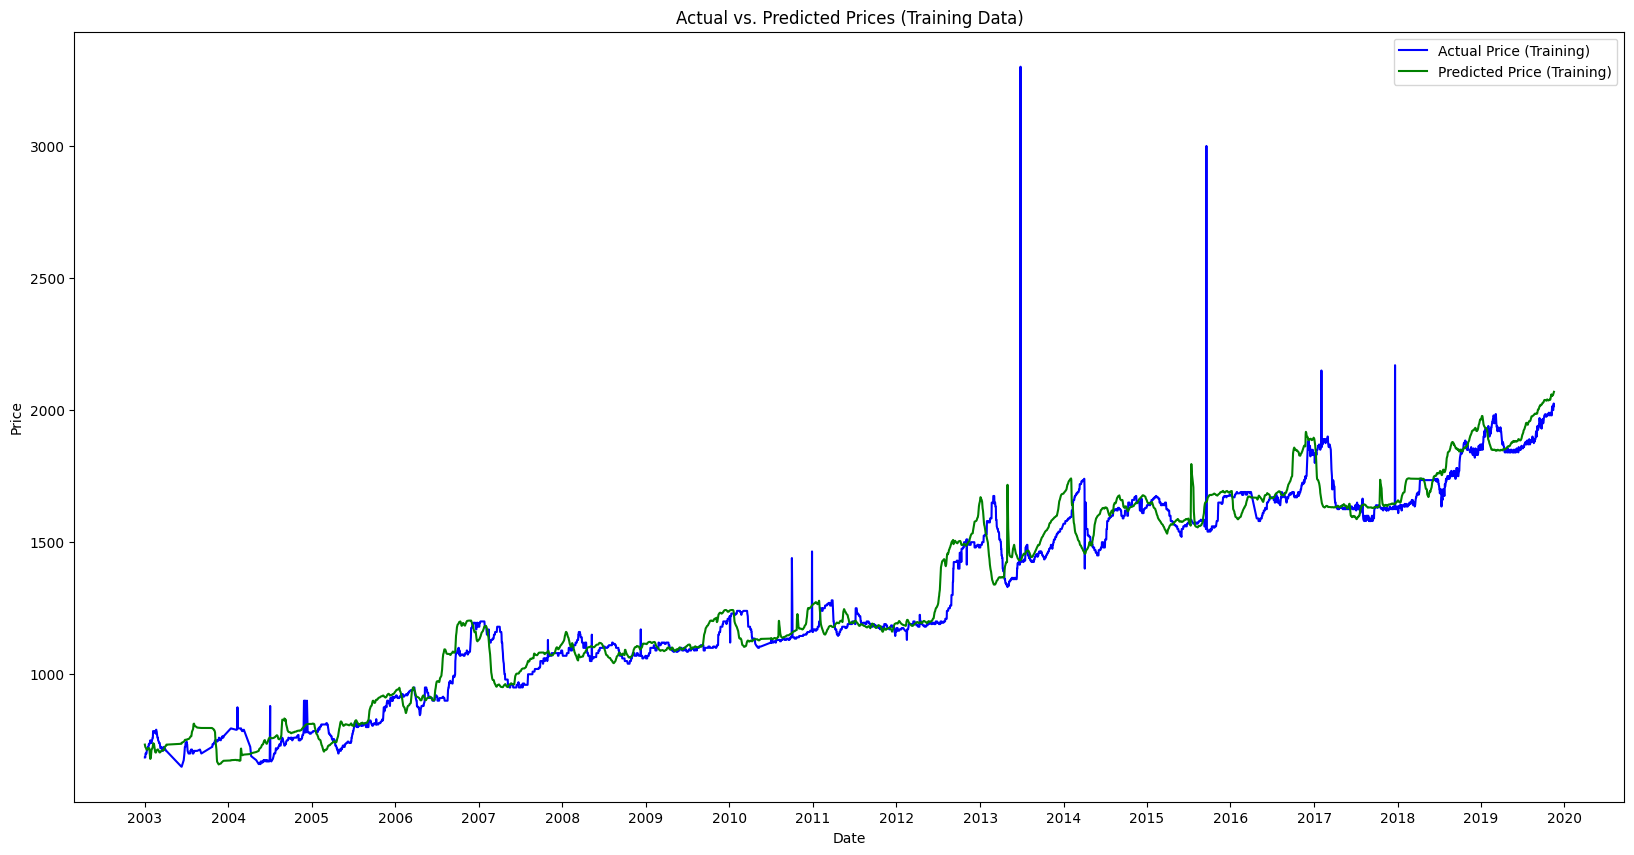

In [ ]:
plot_training_data(train_predict)

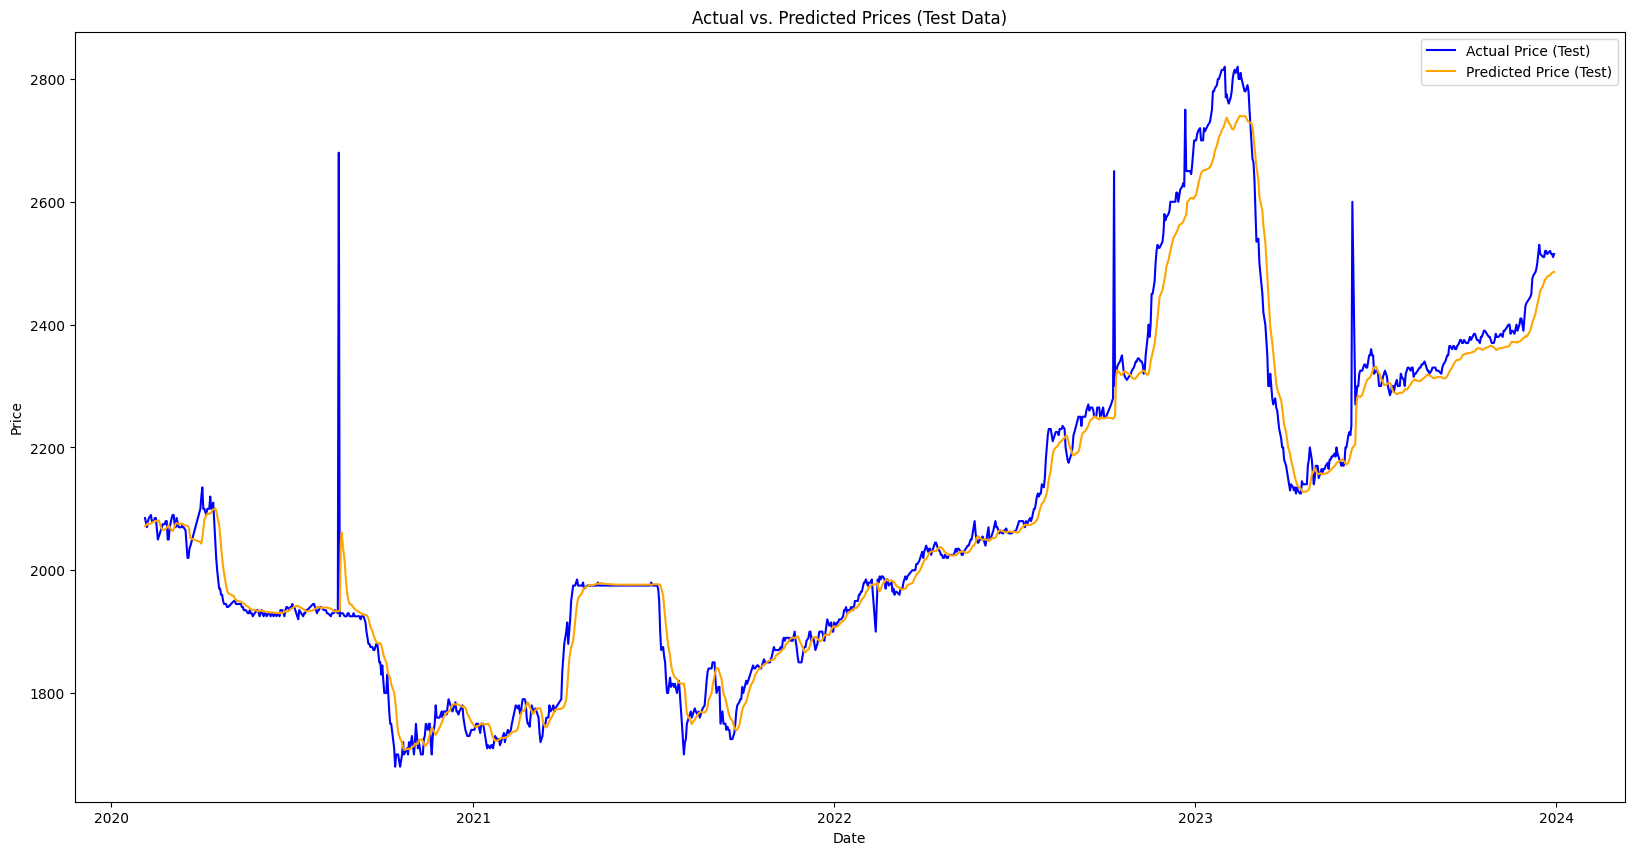

In [ ]:
plot_testing_data(test_predict)